## COBRA Visualisations

This notebook will cover the visulaisation and plotting of COBRA. 

In [1]:
%matplotlib inline
import numpy as np
from pycobra.cobra import cobra
from pycobra.visualisation import visualisation
from pycobra.diagnostics import diagnostics

In [2]:
# setting up our random data-set
rng = np.random.RandomState(42)

# D1 = train machines; D2 = create COBRA; D3 = calibrate epsilon, alpha; D4 = testing
n_features = 2
D1, D2, D3, D4 = 200, 200, 200, 200
D = D1 + D2 + D3 + D4
X = rng.uniform(-1, 1, D * n_features).reshape(D, n_features)
# Y = np.power(X[:,1], 2) + np.power(X[:,3], 3) + np.exp(X[:,10]) 
Y = np.power(X[:,0], 2) + np.power(X[:,1], 3)

# training data-set
X_train = X[:D1 + D2]
X_test = X[D1 + D2 + D3:D1 + D2 + D3 + D4]
X_eps = X[D1 + D2:D1 + D2 + D3]
# for testing
Y_train = Y[:D1 + D2]
Y_test = Y[D1 + D2 + D3:D1 + D2 + D3 + D4]
Y_eps = Y[D1 + D2:D1 + D2 + D3]

# set up our COBRA machine with the data
COBRA = cobra(X_train, Y_train, epsilon = 0.5)

### Plotting COBRA

We use the visualisation class to plot our results, and for various visualisations.

In [3]:
cobra_vis = visualisation(COBRA, X_test, Y_test)

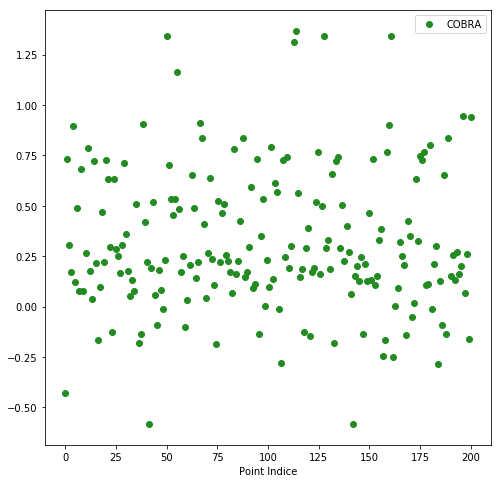

In [4]:
# to plot our machines, we need a linspace as input. This is the 'scale' to plot and should be the range of the results
# since our data ranges from -1 to 1 it is such - and we space it out to a hundred points
cobra_vis.plot_machines(machines=["COBRA"])

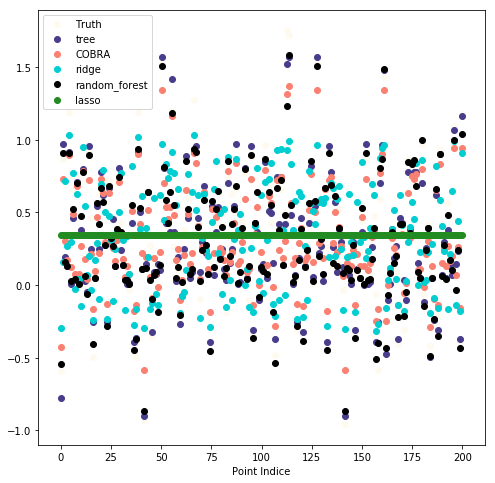

In [5]:
cobra_vis.plot_machines(y_test=Y_test)

### Plots and Visualisations of Results

QQ, Box Plots and Sorted Plots

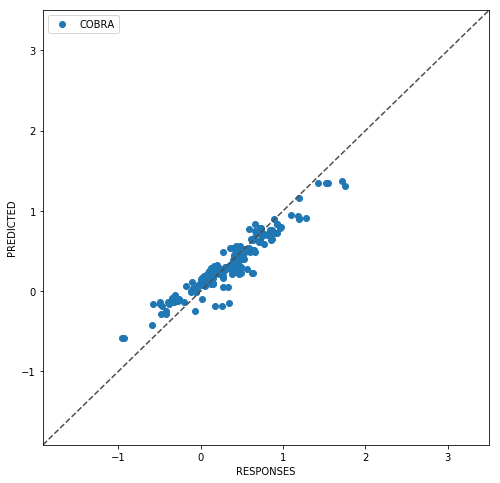

In [6]:
cobra_vis.QQ(Y_test)

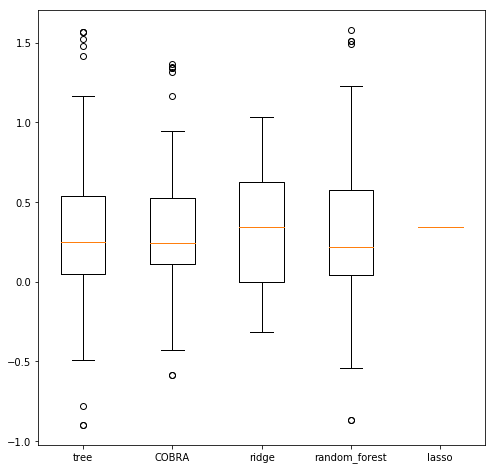

In [7]:
cobra_vis.boxplot()

### Plotting colors!

Going to experiment with plotting colors and data.
After we get information about which indices are used by which machines the best for a fixed epsilon (or not, we can toggle this option), we can plot the distribution of machines. We first present a plot where the machine colors are mixed depending on which machines were selected; after which we plot one machine at a time.

In [8]:
indices, MSE = cobra_vis.indice_info(X_eps[0:50], Y_eps[0:50], epsilon=0.50)

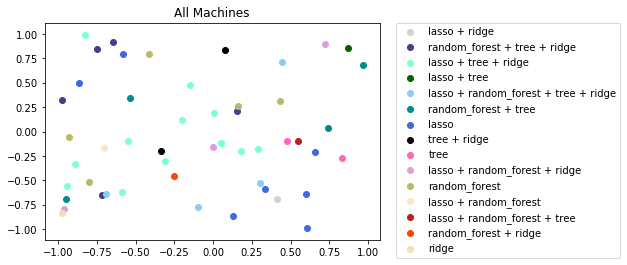

In [9]:
cobra_vis.color_cobra(X_eps[0:50], indice_info=indices, single=True)

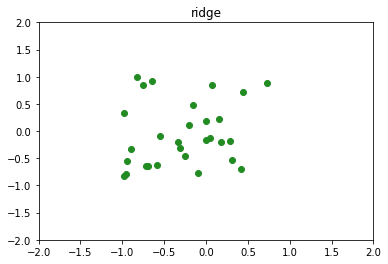

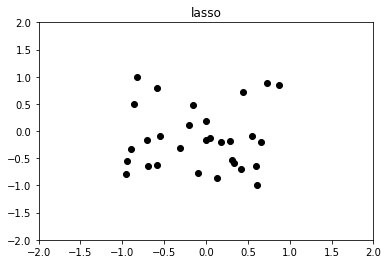

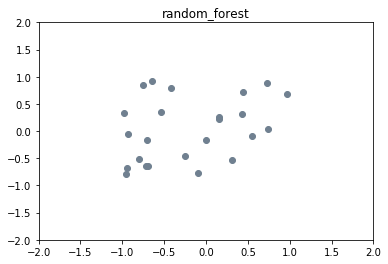

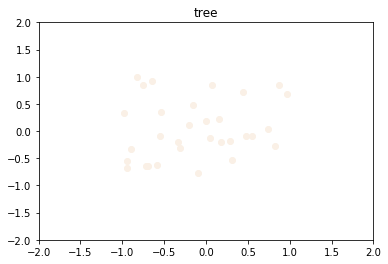

In [10]:
cobra_vis.color_cobra(X_eps[0:50], indice_info=indices)

### Voronoi Tesselation

We present a variety of Voronoi Tesselation based plots - the purpose of this is to help in visualising the pattern of points which tend to be picked up.

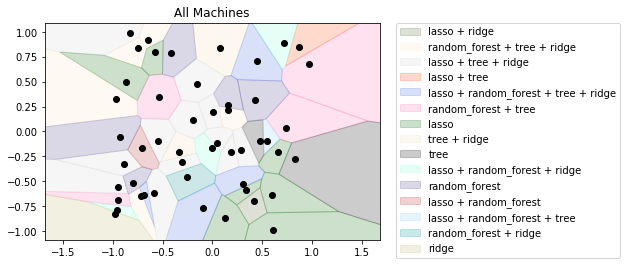

In [11]:
cobra_vis.voronoi(X_eps[0:50], indice_info=indices, single=True)

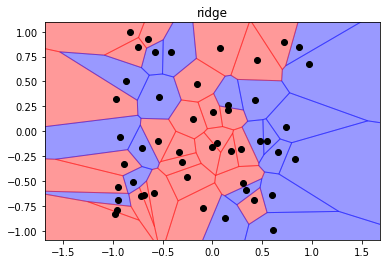

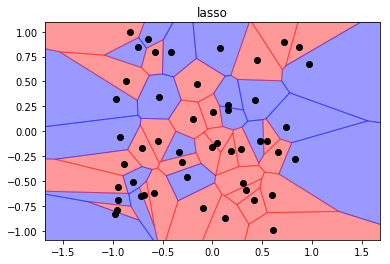

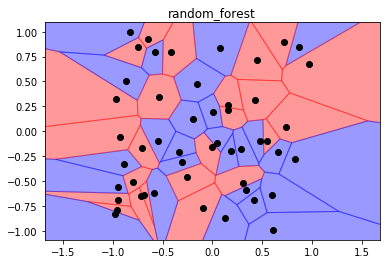

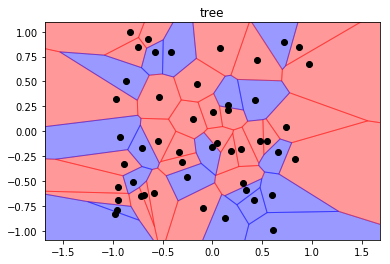

In [12]:
cobra_vis.voronoi(X_eps[0:50], indice_info=indices)

### Gradient-Colored Based Voronoi



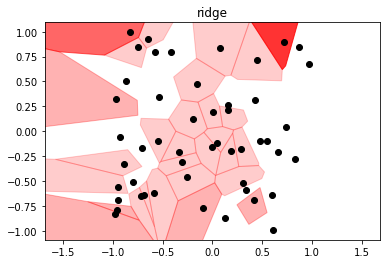

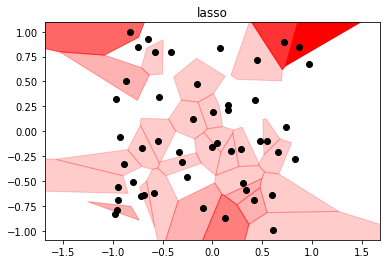

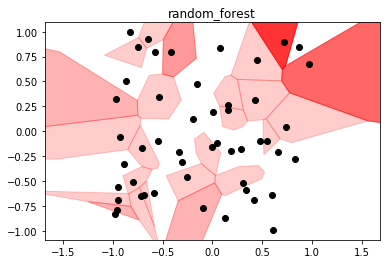

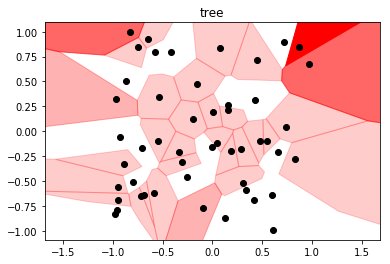

In [13]:
cobra_vis.voronoi(X_eps[0:50], indice_info=indices, MSE=MSE, gradient=True)